In [53]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import sys
import os
import matplotlib.pyplot as plt 

In [54]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [55]:
x_train.shape # 이미지 60000장, 28*28 사이즈 

(60000, 28, 28)

In [56]:
x_test.shape # 이미지 10000장

(10000, 28, 28)

In [57]:
print('학습용 데이터 셋 이미지 수: %d 개'%(x_train.shape[0]))
print('테스트용 데이터 셋 이미지 수: %d 개'%(x_test.shape[0]))

학습용 데이터 셋 이미지 수: 60000 개
테스트용 데이터 셋 이미지 수: 10000 개


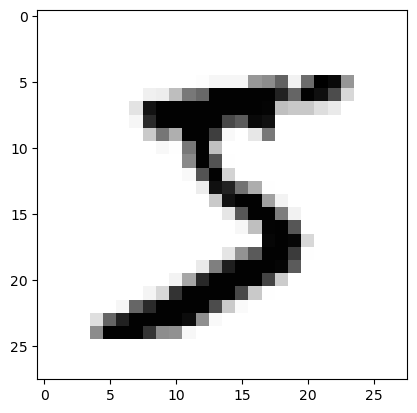

In [58]:
# 첫번째 이미지 확인

plt.imshow(x_train[0], cmap='Greys') # 흑백 이미지 출력
plt.show()

In [59]:
# 이미지 생성 원리 알고싶다.

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%-3s'%i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

---

In [60]:
# 차원 변환 과정 실습 

x_train.reshape(x_train.shape[0],784) # 784 = 28*28
x_train = x_train.astype('float64')
x_train = x_train / 255 # 정규화 (명도를 0~1 사이로 나타내기 위해서)

x_test = x_test.reshape(x_test.shape[0],784).astype('float64') / 255

In [61]:
# 클래스 값 확인
print("class: %d" %(y_train[0]))

class: 5


In [62]:
# 이진화(binary) >> one hot encoding

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [63]:
# 딥러닝 기본 프레임 만들기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import sys
import os
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [64]:
# MNIST 데이터 불러오기

# (x_train,y_train), (x_test,y_test) = mnist.load_data()

# # 차원 변환 후, 학습용 / 테이스용 분리 

# x_train = x_train.reshape(x_train.shape[0],784).astype('float64') / 255
# x_test = x_test.reshape(x_test.shape[0],784).astype('float64') / 255

# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# 모델 구조 설정 
# model = Sequential()
# model.add(Dense(512, input_dim=784, activation = 'relu'))
# model.add(Dense(10, activation='softmax'))
# model.summary()

---

### 컨볼루션 신경망 설정

In [65]:
# MNIST 데이터 불러오기

(x_train,y_train), (x_test,y_test) = mnist.load_data()

# 차원 변환 후, 학습용 / 테이스용 분리 

x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float64') / 255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float64') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [66]:
model = Sequential() 
model.add(Conv2D(32, kernel_size = (3,3),input_shape= (28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

In [67]:
# 모델 실행 환경 설정 

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# 모델 최적화 구역 설정 
MODEL_DIR = './data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './data/model/mnist.hdf5'
checkpointer = ModelCheckpoint(filepath= modelpath, monitor='val_loss', verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [68]:
# 모델 실행

history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, 
          verbose=0, callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도 출력 
print('\n Test Dataset ACC: %.4f' %(model.evaluate(x_test,y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08008, saving model to ./data/model\mnist.hdf5

Epoch 2: val_loss improved from 0.08008 to 0.05526, saving model to ./data/model\mnist.hdf5

Epoch 3: val_loss improved from 0.05526 to 0.04938, saving model to ./data/model\mnist.hdf5

Epoch 4: val_loss improved from 0.04938 to 0.04559, saving model to ./data/model\mnist.hdf5

Epoch 5: val_loss improved from 0.04559 to 0.04108, saving model to ./data/model\mnist.hdf5

Epoch 6: val_loss did not improve from 0.04108

Epoch 7: val_loss did not improve from 0.04108

Epoch 8: val_loss improved from 0.04108 to 0.04040, saving model to ./data/model\mnist.hdf5

Epoch 9: val_loss did not improve from 0.04040

Epoch 10: val_loss did not improve from 0.04040

Epoch 11: val_loss improved from 0.04040 to 0.03879, saving model to ./data/model\mnist.hdf5

Epoch 12: val_loss did not improve from 0.03879

Epoch 13: val_loss did not improve from 0.03879

Epoch 14: val_loss did not improve from 0.03879

Epoch 15: v

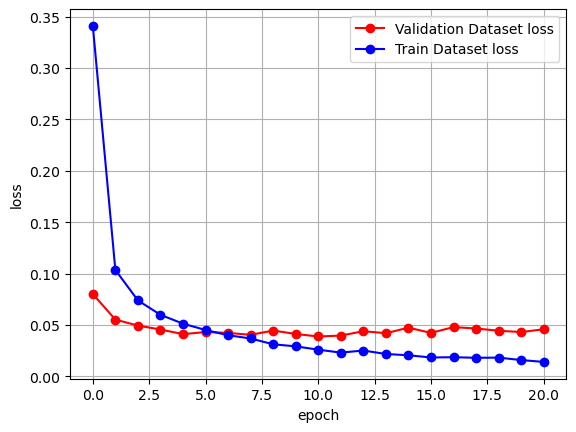

In [69]:
# 학습용 데이터 셋 / 검증 셋 오차 저장 

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c = 'red', label='Validation Dataset loss')
plt.plot(x_len,y_loss, marker='o',c='blue', label='Train Dataset loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()